In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from warnings import warn
import heapq
import time

In [27]:
img = Image.open('C:/Users/lenovo/Desktop/yapayZeka/18.jpg').convert('RGB')
width, height = img.size
pix_val = list(img.getdata())
dizi = list()
for r,g,b in pix_val:
    if r == 0:
        r = 1
    else:
        r = 255 - r 
    dizi.append(r)
grid = np.zeros((1000,1000))

In [28]:
count = 0
while(count<1000000):
    for i in range(0,1000):
        for j in range(0,1000):
            grid[i][j] = dizi[count]
            count += 1

In [29]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.h = 0

    def __eq__(self, other):
        return self.position == other.position
    
    def __repr__(self):
        return f"{self.position} -  {self.h}"

    def __lt__(self, other):
        return self.h < other.h
    def __gt__(self, other):
        return self.h > other.h

def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]

def BFS(maze, start, end, allow_diagonal_movement = True):

    start_node = Node(None, start)
    start_node.h  = 0
    end_node = Node(None, end)
    end_node.h = 0

    open_list = []
    closed_list = []

    heapq.heapify(open_list) 
    heapq.heappush(open_list, start_node)

    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1),)

    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
            warn("giving up on pathfinding too many iterations")
            return return_path(current_node)       
        
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        if current_node == end_node:
            return return_path(current_node)

        children = []
        for new_position in adjacent_squares:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)
        for child in children:
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            if len([open_node for open_node in open_list if child.position == open_node.position and child.h > open_node.h]) > 0:
                continue
            heapq.heappush(open_list, child)
    warn("Couldn't get a path to destination")
    return None

In [30]:
start = (50,35)
end = (800, 845)
baslangıc_zaman=time.time()
path = BFS(grid,start, end)
print(path)
bitis_zaman=time.time()
print("Searching-Time : ",  bitis_zaman-baslangıc_zaman)

[(50, 35), (51, 36), (52, 37), (53, 38), (54, 39), (55, 40), (56, 41), (57, 42), (58, 43), (59, 44), (60, 45), (61, 46), (62, 47), (63, 48), (64, 49), (65, 50), (66, 51), (67, 52), (68, 53), (69, 54), (70, 55), (71, 56), (72, 57), (73, 58), (74, 59), (75, 60), (76, 61), (77, 62), (78, 63), (79, 64), (80, 65), (81, 66), (82, 67), (83, 68), (84, 69), (85, 70), (86, 71), (87, 72), (88, 73), (89, 74), (90, 75), (91, 76), (92, 77), (93, 78), (94, 79), (95, 80), (96, 81), (97, 82), (98, 83), (99, 84), (100, 85), (101, 86), (102, 87), (103, 88), (104, 89), (105, 90), (106, 91), (107, 92), (108, 93), (109, 94), (110, 95), (111, 96), (112, 97), (113, 98), (114, 99), (115, 100), (116, 101), (117, 102), (118, 103), (119, 104), (120, 105), (121, 106), (122, 107), (123, 108), (124, 109), (125, 110), (126, 111), (127, 112), (128, 113), (129, 114), (130, 115), (131, 116), (132, 117), (133, 118), (134, 119), (135, 120), (136, 121), (137, 122), (138, 123), (139, 124), (140, 125), (141, 126), (142, 127)

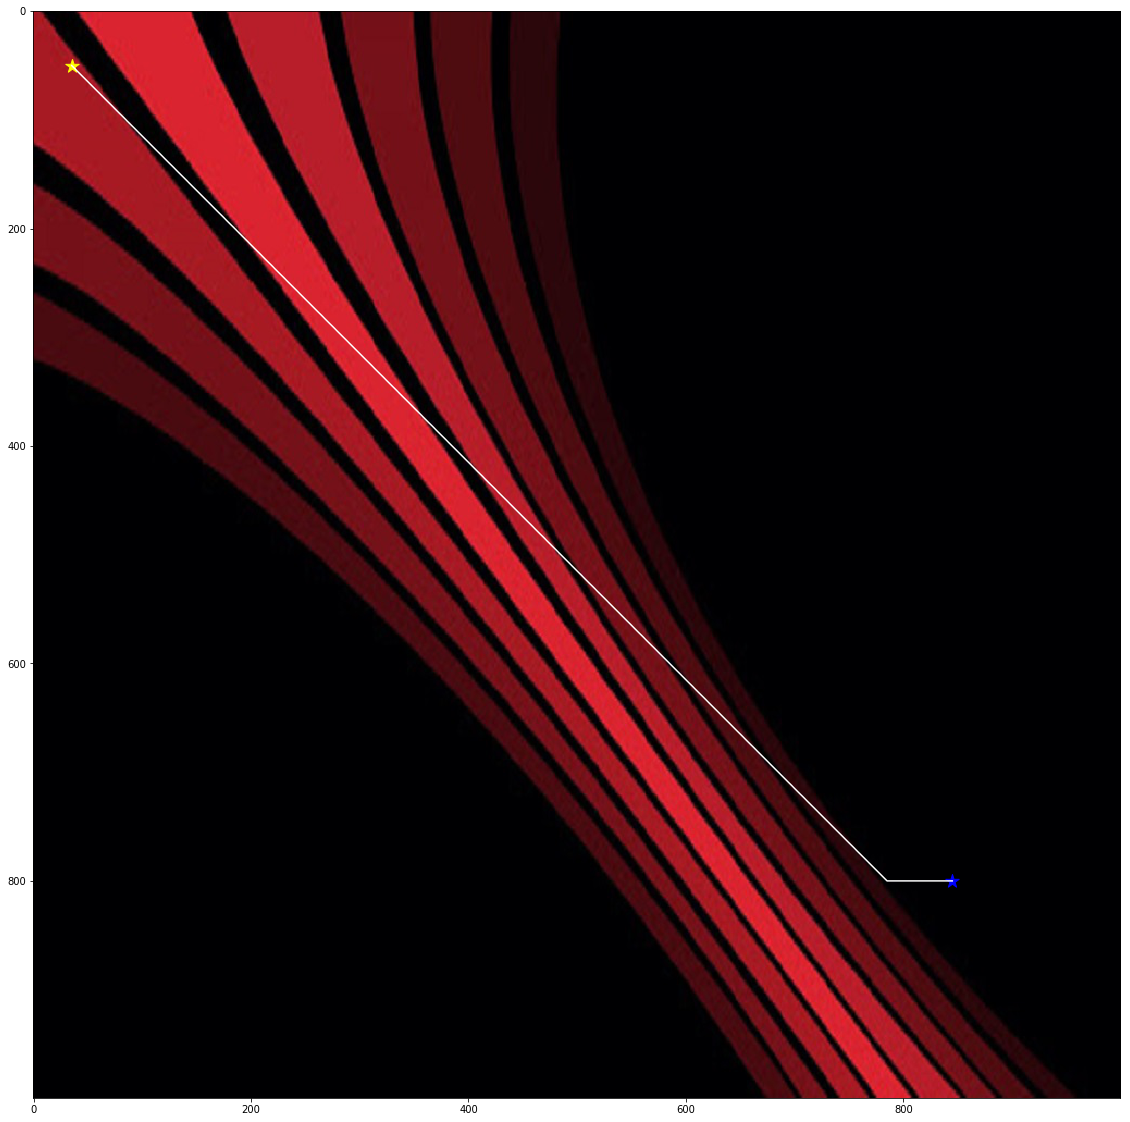

In [20]:
# plot the path
x_coords = []
y_coords = []
for i in (range(0,len(path))):
    x = path[i][0]
    y = path[i][1]
    x_coords.append(x)
    y_coords.append(y)
# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(end[1],end[0], marker = "*", color = "blue", s = 200)
ax.plot(y_coords,x_coords, color = "white")
plt.show()